/Users/yingrui/cgeniepy/src/cgeniepy/model.py:53: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")
/Users/yingrui/cgeniepy/src/cgeniepy/skill.py:422: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(np.arccos(correlation), std,*args, **kwargs)


AttributeError: 'TaylorDiagram' object has no attribute 'ax'

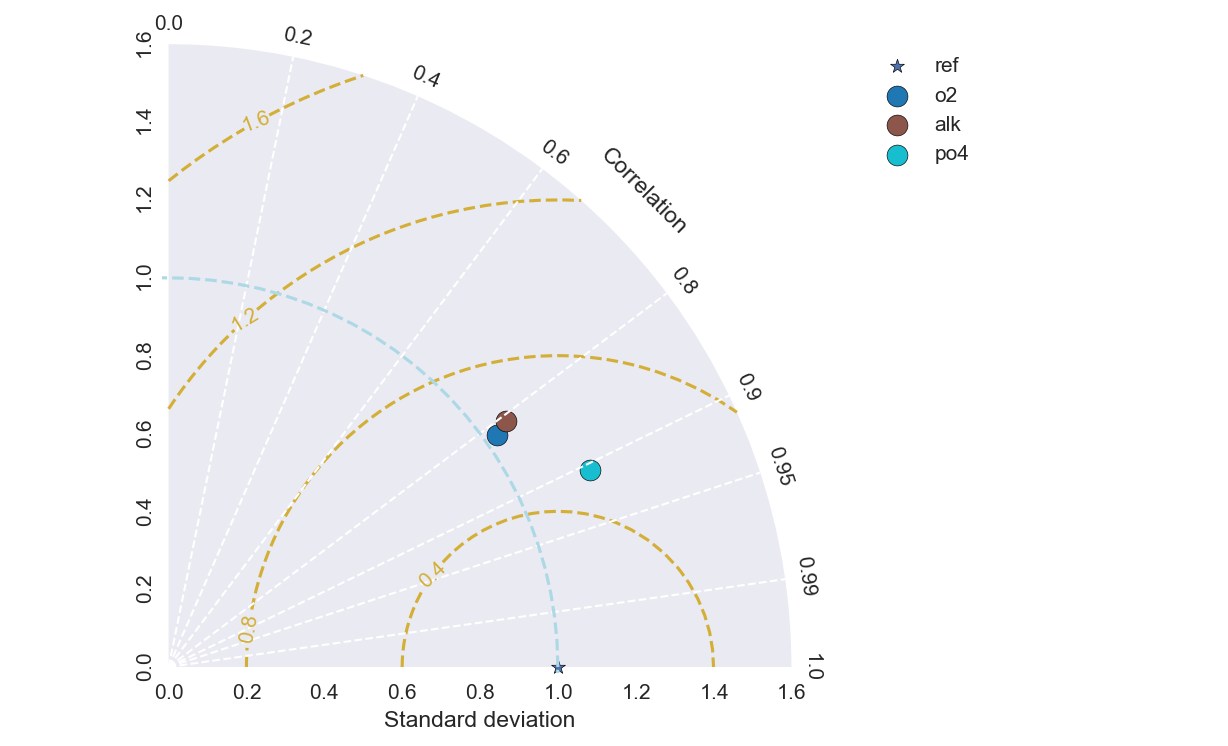

In [17]:
from cgeniepy.model import GenieModel
from cgeniepy.skill import ArrComparison
from cgeniepy.skill import TaylorDiagram
import cgeniepy

sample_model = cgeniepy.sample_model()
bgc_data = cgeniepy.load_obs('worjh2')

genie_var  = ['ocn_O2', 'ocn_ALK','ocn_PO4', 'ocn_temp', 'ocn_sal', 'ocn_DIC', 'ocn_DIC_13C','ocn_TDFe']
obs_var = ['o2', 'alk', 'po4', 'temp', 'sal', 'dic', 'd13C','dFe']

arr_comps = []
for x,y1 in zip(genie_var, obs_var):
    obs = bgc_data[y1]
    model = sample_model.get_var(x).isel(time=-1)
    tmp = ArrComparison(model.data.to_numpy(), obs.to_numpy(), label=y1)
    arr_comps.append(tmp)

import matplotlib.pyplot as plt
fig = plt.figure()

td1 = TaylorDiagram(arr_comps[:3])
td2 = TaylorDiagram(arr_comps[3:6])

td1.setup_ax(crmse_contour=True,fig=fig)
td1.plot(s=100)

td2.plot(s=100)

#tay_diagram.savefig("/Users/yingrui/Desktop/standard_model.png",dpi=300)

In [1]:
import cgeniepy

sample_model = cgeniepy.sample_model()
data = sample_model.get_var("ocn_sur_temp").isel(time=-1).fill_poles().data

/Users/yingrui/cgeniepy/src/cgeniepy/model.py:53: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


In [9]:
da = sample_model.get_var("ocn_temp").isel(time=-1,lon=10)

In [12]:
fig = pygmt.Figure()
fig.grdimage(da.data)
fig.show()

/Users/yingrui/miniforge3/envs/workspace/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'lat' dimension, but GMT only supports regular spacing. Calculated regular spacing 4.36935984357822 is assumed in the 'lat' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.12/site-packages/pygmt/clib/session.py:1655: RuntimeWarning: Grid may have irregular spacing in the 'zt' dimension, but GMT only supports regular spacing. Calculated regular spacing 304.26787787467106 is assumed in the 'zt' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)
grdimage [ERROR]: South is outside -90 to +90 degree range
grdimage [ERROR]: General map projection error


GMTCLibError: Module 'grdimage' failed with status code 74:
grdimage [ERROR]: South is outside -90 to +90 degree range
grdimage [ERROR]: General map projection error

makecpt [WARNING]: cmap_gypsum.cpt is a discrete CPT. You can stretch it (-T<min>/<max>) but not interpolate it (-T<min>/<max>/<inc>).
makecpt [WARNING]: Selecting the given range and ignoring the increment setting.


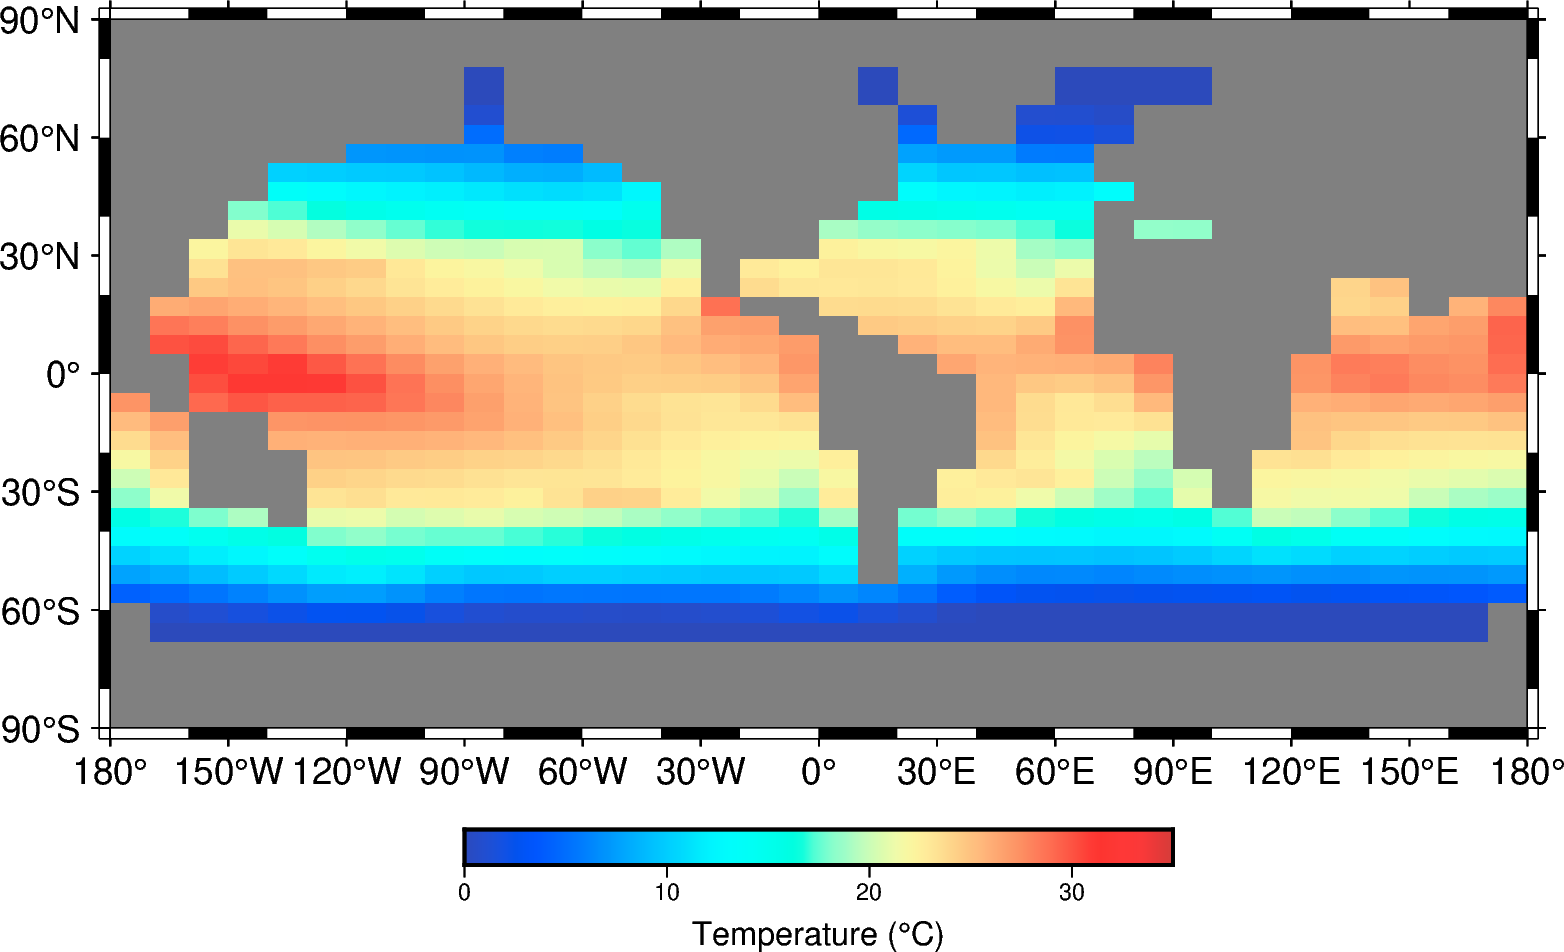

In [6]:
import pygmt
fig = pygmt.Figure()

pygmt.makecpt(cmap="cmap_gypsum.cpt", series=[0, 35, 5], reverse=True)

fig.grdimage(
    data,
    region='d',
    projection="Q12c",
    frame="a30f20",    
)

fig.colorbar(
    position="JBC+w6c/0.3c+mc+h", frame="a10f20+lTemperature (°C)"
)
fig.show()

In [1]:
from cgeniepy.model import GenieModel

model_61 = GenieModel("/Users/yingrui/Desktop/muffin.M20Sc61_.PO4.SPIN")
model_52 = GenieModel("/Users/yingrui/Desktop/muffin.M20Sc52_.PO4.SPIN")

/Users/yingrui/cgeniepy/src/cgeniepy/model.py:53: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


In [2]:
depth = 1000  # Depth in meters
poc_61 = model_61.get_var("bio_fpart_POC").isel(time=-1).sel(zt=depth, method="nearest")
poc_52 = model_52.get_var("bio_fpart_POC").isel(time=-1).sel(zt=depth, method="nearest")

o2_61 = model_61.get_var("ocn_O2").isel(time=-1).sel(zt=depth, method="nearest")
o2_52 = model_52.get_var("ocn_O2").isel(time=-1).sel(zt=depth, method="nearest")

temp_61 = model_61.get_var("ocn_temp").isel(time=-1).sel(zt=depth, method="nearest")
temp_52 = model_52.get_var("ocn_temp").isel(time=-1).sel(zt=depth, method="nearest")

print(poc_61.data.zt.item())

1040.1034426083352


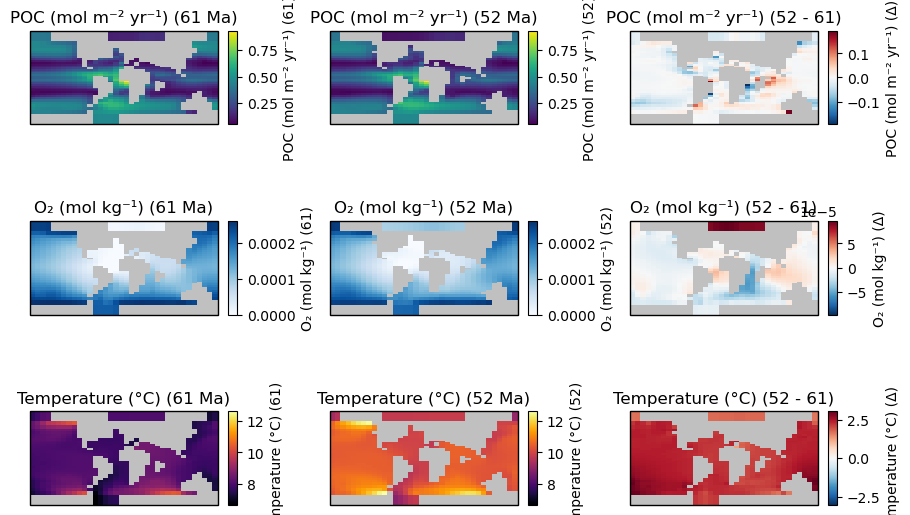

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.axes import Axes  # plain MPL Axes, no projection

# Prepare 3×3 figure
fig, axs = plt.subplots(
    3, 3,
    figsize=(9, 6),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

variables = [
    ('POC (mol m⁻² yr⁻¹)',    poc_61,  poc_52,  'viridis'),
    ('O₂ (mol kg⁻¹)',         o2_61,   o2_52,   'Blues'),
    ('Temperature (°C)',      temp_61, temp_52, 'inferno')
]

for row, (label, a, b, cmap) in enumerate(variables):
    # compute shared color limits
    vmin = float(min(a.min().data.item(), b.min().data.item()))
    vmax = float(max(a.max().data.item(), b.max().data.item()))

    # Model 61 (col 0)
    im1 = a.plot(
        ax=axs[row, 0],
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        add_colorbar=False
    )
    axs[row, 0].set_title(f'{label} (61 Ma)')

    # Model 52 (col 1)
    im2 = b.plot(
        ax=axs[row, 1],
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        add_colorbar=False
    )
    axs[row, 1].set_title(f'{label} (52 Ma)')

    diff = b - a
    half_range = float(max(abs(diff.min().data.item()), abs(diff.max().data.item())))
    im3 = diff.plot(
        ax=axs[row, 2],
        cmap='RdBu_r',
        vmin=-half_range,
        vmax= half_range,
        add_colorbar=False
    )
    axs[row, 2].set_title(f'{label} (52 - 61)')

    # attach small vertical colorbars exactly as before…
    for ax, im, suffix in [
        (axs[row, 0], im1, '61'),
        (axs[row, 1], im2, '52'),
        (axs[row, 2], im3, 'Δ')
    ]:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.1, axes_class=Axes)
        fig.colorbar(im, cax=cax, orientation='vertical', label=f'{label} ({suffix})')

fig.tight_layout()
fig.savefig("/Users/yingrui/Desktop/muffin_model_comparison.pdf", dpi=300, bbox_inches='tight')

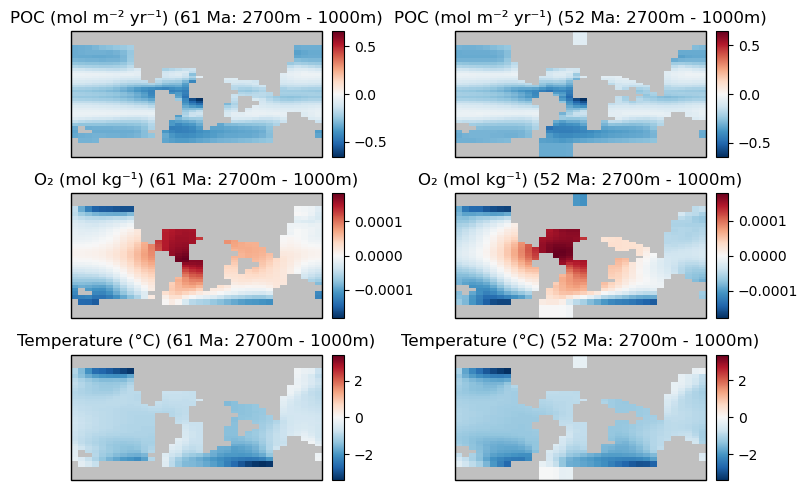

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.axes import Axes

# Your existing 3×3 figure code remains the same...
poc_52 = model_52.get_var("bio_fpart_POC").isel(time=-1)
poc_61 = model_61.get_var("bio_fpart_POC").isel(time=-1)
o2_52 = model_52.get_var("ocn_O2").isel(time=-1)
o2_61 = model_61.get_var("ocn_O2").isel(time=-1)
temp_52 = model_52.get_var("ocn_temp").isel(time=-1)
temp_61 = model_61.get_var("ocn_temp").isel(time=-1)

# Extract depth-specific data (adjust the depth coordinate name as needed)
# Assuming your depth coordinate is named 'depth' or similar
poc_61_2500m = poc_61.sel(zt=2700, method='nearest')
poc_61_1000m = poc_61.sel(zt=1000, method='nearest')
poc_52_2500m = poc_52.sel(zt=2700, method='nearest')
poc_52_1000m = poc_52.sel(zt=1000, method='nearest')

o2_61_2500m = o2_61.sel(zt=2700, method='nearest')
o2_61_1000m = o2_61.sel(zt=1000, method='nearest')
o2_52_2500m = o2_52.sel(zt=2700, method='nearest')
o2_52_1000m = o2_52.sel(zt=1000, method='nearest')

temp_61_2500m = temp_61.sel(zt=2700, method='nearest')
temp_61_1000m = temp_61.sel(zt=1000, method='nearest')
temp_52_2500m = temp_52.sel(zt=2700, method='nearest')
temp_52_1000m = temp_52.sel(zt=1000, method='nearest')

## Create depth comparison figure (3×2)
fig_depth, axs_depth = plt.subplots(
    3, 2,
    figsize=(8, 5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

variables_depth = [
    ('POC (mol m⁻² yr⁻¹)', 
     poc_61_2500m, poc_61_1000m, poc_52_2500m, poc_52_1000m, 'viridis'),
    ('O₂ (mol kg⁻¹)', 
     o2_61_2500m, o2_61_1000m, o2_52_2500m, o2_52_1000m, 'Blues'),
    ('Temperature (°C)', 
     temp_61_2500m, temp_61_1000m, temp_52_2500m, temp_52_1000m, 'inferno')
]

for row, (label, deep_61, shallow_61, deep_52, shallow_52, cmap) in enumerate(variables_depth):
    
    # Column 0: 61 Ma (2500m - 1000m)
    diff_61 = deep_61 - shallow_61
    half_range_61 = float(max(abs(diff_61.min().data.item()), abs(diff_61.max().data.item())))
    im1 = diff_61.plot(
        ax=axs_depth[row, 0],
        cmap='RdBu_r',
        vmin=-half_range_61, vmax=half_range_61,
        add_colorbar=False
    )
    axs_depth[row, 0].set_title(f'{label} (61 Ma: 2700m - 1000m)')

    # Column 1: 52 Ma (2500m - 1000m)
    diff_52 = deep_52 - shallow_52
    half_range_52 = float(max(abs(diff_52.min().data.item()), abs(diff_52.max().data.item())))
    im2 = diff_52.plot(
        ax=axs_depth[row, 1],
        cmap='RdBu_r',
        vmin=-half_range_52, vmax=half_range_52,
        add_colorbar=False
    )
    axs_depth[row, 1].set_title(f'{label} (52 Ma: 2700m - 1000m)')
    
    # Add colorbars
    for col, (ax, im) in enumerate([
        (axs_depth[row, 0], im1),
        (axs_depth[row, 1], im2)
    ]):
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.1, axes_class=Axes)
        fig_depth.colorbar(im, cax=cax, orientation='vertical')

fig_depth.tight_layout()
fig_depth.savefig("/Users/yingrui/Desktop/muffin_depth_comparison.pdf", dpi=300, bbox_inches='tight')